#Importing libraries and datasets

In [ ]:
import pandas as pd
import numpy as np
import pathlib
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading train, validation and test datasets from drive.

In [ ]:
x_train = np.load("/content/drive/MyDrive/ColabNotebooks/lists/x_train.npy")

In [ ]:
print(type(x_train))
print(len(x_train))

<class 'numpy.ndarray'>
600


In [ ]:
y_train = np.load("/content/drive/MyDrive/ColabNotebooks/lists/y_train.npy")

x_val = np.load("/content/drive/MyDrive/ColabNotebooks/lists/x_val.npy")

y_val = np.load("/content/drive/MyDrive/ColabNotebooks/lists/y_val.npy")

x_test = np.load("/content/drive/MyDrive/ColabNotebooks/lists/x_test.npy")

y_test = np.load("/content/drive/MyDrive/ColabNotebooks/lists/y_test.npy")

In [ ]:
len(x_test)

200

# Pre-trained model selection and training

In [ ]:
import tensorflow_hub as hub

feature_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4" 

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_model, input_shape=(224, 224, 3), trainable=False)

In [ ]:
num_of_classes = 2

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
  metrics=['acc'])


Training train data with the validation set. 

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    validation_data=(x_val, y_val), steps_per_epoch= 100)

Epoch 1/10
100/100 [==============================] - 26s 220ms/step - loss: 0.9883 - acc: 0.8300 - val_loss: 0.5614 - val_acc: 0.8800
Epoch 2/10
100/100 [==============================] - 23s 229ms/step - loss: 0.5950 - acc: 0.8550 - val_loss: 0.5614 - val_acc: 0.8800
Epoch 3/10
100/100 [==============================] - 22s 219ms/step - loss: 0.5950 - acc: 0.8550 - val_loss: 0.5614 - val_acc: 0.8800
Epoch 4/10
100/100 [==============================] - 22s 221ms/step - loss: 0.5950 - acc: 0.8550 - val_loss: 0.5614 - val_acc: 0.8800
Epoch 5/10
100/100 [==============================] - 24s 240ms/step - loss: 0.5977 - acc: 0.8450 - val_loss: 0.5926 - val_acc: 0.8750
Epoch 6/10
100/100 [==============================] - 22s 220ms/step - loss: 0.6250 - acc: 0.8633 - val_loss: 0.5961 - val_acc: 0.8800
Epoch 7/10
100/100 [==============================] - 22s 221ms/step - loss: 0.6250 - acc: 0.8633 - val_loss: 0.5961 - val_acc: 0.8800
Epoch 8/10
100/100 [==============================] - 2

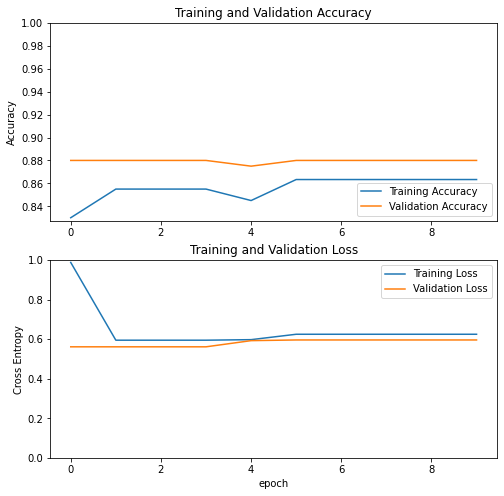

In [ ]:

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# Results for test data

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Test accuracy :', accuracy)

7/7 [==============================] - 5s 684ms/step - loss: 0.6100 - acc: 0.8800
Test accuracy : 0.8799999952316284
